<a href="http://landlab.github.io"><img style="float: left" 
src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>



## Reuse Ecohydrology Model with Gridded Hydrometeorology Forcing 

* Load data from a Landlab Cellular Automaton Vegetation-Ecohydrologic Model model published on HydroShare. <br />
* Define a geographic subset (New Mexico) within the North America.
* Calculate mean climatology for a range of elevation bands.
* Run the Landlab ecohydrology model for a watershed given various climate scenarios.<br />
* Explore sensitivity to climate by comparing the watershed model results.
* Save results to a new HydroShare resource.  <br />

## Sai- we need a citation here and to update the text below.  <br />

This notebook was developed from code written by Sai.... as part of his PhD disseration at the University of Washington.

## To run this notebook:

Click in each shaded code block below and use "shift + enter" keys. Alternatively, you can run groups of cells by clicking "Cell" on the menu above and selecting among the various run options. This is also where you can clear outputs from previous runs.

If an error occurs, click on *Kernal* and *Restart and Clear Outputs* in the menu above.
<hr> <small> For more instructions on how to run an interactive IPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<br>
<small>For the unexpanded version to download and run, click here: <a href="http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb">http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb</a></small><br>

## 1. Introduction

** 1.1 Theory**

Depth -averaged root zone water balance can be respresented by 
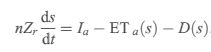
where      
&nbsp;&nbsp;&nbsp;&nbsp;$n = soil porosity$,
## Sai- we need to fix this equation please, and references below.  <br />
&nbsp;&nbsp;&nbsp;&nbsp;$ \leftZ^r\right= effective roting depth[mm] $,
&nbsp;&nbsp;&nbsp;&nbsp;$x = location \space in \space space \left[L\right]$   
&nbsp;&nbsp;&nbsp;&nbsp;$g = acceleration \space due \space to \space gravity \left[L{T^{-2}}\right]$  
&nbsp;&nbsp;&nbsp;&nbsp;$h = water \space depth \left[L\right]$  
&nbsp;&nbsp;&nbsp;&nbsp;$z = bed \space elevation \left[L\right]$  
&nbsp;&nbsp;&nbsp;&nbsp;$n = Manning's \space roughness \space coeffiecient \left[T{L^{{-1}/{3}}}\right]$  
&nbsp;&nbsp;&nbsp;&nbsp;$R = hydraulic \space radius \left[L\right]$  
&nbsp;&nbsp;&nbsp;&nbsp;$A_{xs} = cross-sectional \space area \left[L^2\right]$ 

where n is soil porosity, Z^r (mm) is the effective roting depth, s is relative saturation, t (d) is time, I^a (mm d^-1) is the rate of actual infiltation, ET_a (mm d^-1) is the actual rate of evapotranspiration, and D (mm  d^-1) is the rate of leakage from the root zone (e.g., Eagleson, 1982; Rodriguez-Iturbe, 2000). 

This tutorial demonstrates implementation of the Cellular Automaton Tree-GRass-Shrub Simulator (CATGRaSS) [Zhou et al., 2013] on a flat domain. This model is built using components from the Landlab component library. CATGRaSS is spatially explicit model of plant coexistence. It simulates local ecohydrologic dynamics (soil moisture, transpiration, biomass) and spatial evolution of tree, grass, and shrub Plant Functional Types (PFT) driven by rainfall and solar radiation. 

Each cell in the model grid can hold a single PFT or remain empty. Tree and shrub plants disperse seeds to their neighbors. Grass seeds are assumed to be available at each cell. Establishment of plants in empty cells is determined probabilistically based on water stress of each PFT. Plants with lower water stress have higher probability of establishment. Plant mortality is simulated probabilistically as a result of aging and drought stress. Fires and grazing will be added to this model soon.  

This model (driver) contains:
  - A local vegetation dynamics model that simulates storm and inter-storm water balance and ecohydrologic fluxes (ET, runoff), and plant biomass dynamics by coupling the following components:
        - PrecipitationDistribution
        - Radiation
        - PotentialEvapotranspiration
        - SoilMoisture
        - Vegetation

  - A spatially explicit probabilistic cellular automaton component that simulates plant competition by tracking establishment and mortality of plants based on soil moisture stress:
        - VegCA
    
To run this Jupyter notebook, please make sure that the following files are in the same folder:
        - cellular_automaton_vegetation_flat_domain.ipynb (this notebook)
        - Inputs_Vegetation_CA.txt (Input parameters for the model)
        - Ecohyd_functions_flat.py (Utility functions)

[Ref: Zhou, X, E. Istanbulluoglu, and E.R. Vivoni. "Modeling the ecohydrological role of aspect-controlled radiation on tree-grass-shrub coexistence in a semiarid climate." Water Resources Research 49.5 (2013): 2872-2895]
Rodriguez-Iturbe, I. (2000), Ecohydrology: A hydrologic perspective ofclimate-soil-vegetation dynamics, Water Resour. Res., 36(1), 3–9.
Eagleson, P. S. (1982), Ecological optimality in water-limited natural soilvegetation systems: 1. Theory and hypothesis, Water Resour. Res.,18(2), 325–340.

** 1.2 Landscape **
In this tutorial, we are going to work with a landscape in central New Mexico, USA, where aspect controls the organization of PFTs. The climate in this area is semi-arid with Mean Annual Precipitation (MAP) of 254 mm [Zhou et. al 2013]. 


....see level of example here...
'a steep 27 $km^2$ watershed located in central Colorado. The DEM we will use has a resolution of 30 meters (Adams et al. 2017). To clearly contrast landscape shape, this notebook uses two other modeled "synthetic" landscapes produced using a landscape evolution model developed in Landlab by coupling hillslope diffusion transopt and stream-power erosion rules. One landscape is sauk (length = width) and one is rectangular (length = 4*width). Both landscapes have a drainage area of 36 km$^2$ and a cell size of 30 m.

The watershed domains are available at the Landlab Github site and as Hydroshare resource, and will be imported as part of this exercise.

** 1.3 Climate from different elevations **
In this tutorial, we are going to work with a landscape in central New Mexico, USA, where aspect controls the organization of PFTs. The climate in this area is semi-arid with Mean Annual Precipitation (MAP) of 254 mm [Zhou et. al 2013]. 


....see level of example here...
'a steep 27 $km^2$ watershed located in central Colorado. The DEM we will use has a resolution of 30 meters (Adams et al. 2017). To clearly contrast landscape shape, this notebook uses two other modeled "synthetic" landscapes produced using a landscape evolution model developed in Landlab by coupling hillslope diffusion transopt and stream-power erosion rules. One landscape is sauk (length = width) and one is rectangular (length = 4*width). Both landscapes have a drainage area of 36 km$^2$ and a cell size of 30 m.

The watershed domains are available at the Landlab Github site and as Hydroshare resource, and will be imported as part of this exercise.
![New Mexico Climate by ELevation](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/NewMexicoEcohydrology.jpg "Climate Bands by Elevation")
** 1.3 Steps to Explore the Model** 

We will do the following: 
- Import a landscape domain
- Import and process gridded hydrometeorology
- Initialize the landscape with random distribution of PFTs
- Run the coupled Ecohydrology and cellular automata plant competition model for 50 years
- Visualize and examine outputs

Start at the top by reading each block of text and sequentially running each code block (put your curser in a code block and type shift + enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. 



## 2.0 Methods
**Now on to the code.**

** 2.1 Import Landlab components, functions for importing data, plotting tools, and HydroShare utilities **

To run this notebook, we must import several libraries.
The hs_utils library provides functions for interacting with HydroShare, including resource querying, dowloading. and creation. Additional libraries support the functions of Landlab.

In [1]:
#Landlab toolkit available on CUAHSI JupyterHub 
from landlab import RasterModelGrid as rmg

#Python libraries available on CUAHSI JupyterHub 
import os
import pandas as pd, numpy as np, dask, json
from datetime import datetime, timedelta
import geopandas as gpd

# plotting and shape libraries
%matplotlib inline
import matplotlib.pyplot as plt

# silencing warning
import warnings 
warnings.filterwarnings('ignore')

#HydroShare Utilities
from utilities import hydroshare
hs=hydroshare.hydroshare()


Adding the following system variables:
   HS_USR_NAME = ChristinaBandaragoda
   HS_RES_ID = 70b977e22af544f8a7e5a803935c329c
   HS_RES_TYPE = genericresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => ChristinaBandaragoda
Successfully established a connection with HydroShare


** 2.2 Install software not on already installed on the CUAHSI JupyterHub Server **

In [9]:
!conda install -c conda-forge basemap-data-hires --yes

Fetching package metadata .................
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
basemap-data-hires        1.1.0                         0    conda-forge


In [8]:
!conda install -c conda-forge ogh --yes

Fetching package metadata .................
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
ogh                       0.1.6a0                    py_0    conda-forge


## Jim   Update  
Please see the [Observatory]( https://github.com/ChristinaB/Observatory/blob/master/README.md) repository on Github with a Readme instructions on how to use Git and the JupyterHub server terminal to push/pull changes.   After completing the steps to get the observatory_gridded_hydromet.py script into your HydroShare Utilities folder, execute the next cell. 

In [17]:
import ogh

** 2.3 Set variables for interacting with HydroShare from this notebook **
<br />
The home directory on the JupyterHub server is printed. You can navigate to see the data using a terminal or folders. 

In [18]:
homedir = ogh.mapContentFolder(str(os.environ["HS_RES_ID"]))
print('Data will be loaded from and save to:'+homedir)

Data will be loaded from and save to:/home/jovyan/work/notebooks/data/70b977e22af544f8a7e5a803935c329c/70b977e22af544f8a7e5a803935c329c/data/contents


In [19]:
# initialize ogh_meta data file
meta_file = dict(ogh.ogh_meta())
sorted(meta_file.keys())

[u'dailymet_bclivneh2013',
 u'dailymet_livneh2013',
 u'dailymet_livneh2015',
 u'dailyvic_livneh2013',
 u'dailyvic_livneh2015',
 u'dailywrf_bcsalathe2014',
 u'dailywrf_salathe2014']

** 2.4 Import python scripts from a public HydroShare resource **

In [20]:
hs.getResourceFromHydroShare('d0860ddac0364b7089cc8d7be6476d3d')
#pointer=hs.content['Ecohyd_functions_flat.py']
#print(pointer)
!cp ../../../../d0860ddac0364b7089cc8d7be6476d3d/d0860ddac0364b7089cc8d7be6476d3d/data/contents/Ecohyd_functions_flat.py .

This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


Import libraries from scripts into Jupyter Notebook

In [21]:
from ecohydrology_model_functions import run_ecohydrology_model
from ecohydrology_model_functions import plot_results

** 2.5 Download watershed boundary from HydroShare Resources **

This resource type is Composite Resource containing a Geographic Feature (ESRI Shapefile). 

In [22]:
# Watershed extent
hs.getResourceFromHydroShare('5c041d95ceb64dce8eb85d2a7db88ed7')
riosalado = hs.content['UpperRioSalado_delineatedBoundary.shp']
ogh.reprojShapefile(riosalado)

loc_name='Upper Rio Salado Watershed'
streamflow_watershed_drainage_area=1849242318 # square meters [Sai to update]


This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


** 2.6 Get list of gridded hydrometeorology 1/16 degree centroids **

The data for our processing routines can be retrieved using the getResourceFromHydroShare function by passing in the global identifier from the url above.  In the next cell, we download this resource from HydroShare, and identify that the points in this resource are available for downloading gridded hydrometeorology data, based on the point shapefile at https://www.hydroshare.org/resource/ef2d82bf960144b4bfb1bae6242bcc7f/, which is for the extent of North America and includes the average elevation for each 1/16 degree grid cell.  The file must include columns with station numbers, latitude, longitude, and elevation. The header of these columns must be FID, LAT, LONG_, and ELEV, respectively. The station numbers will be used for the remainder of the code to uniquely reference data from each climate station, as well as to identify minimum, maximum, and average elevation of all of the climate stations.  

In [23]:
# List of available data
hs.getResourceFromHydroShare('ef2d82bf960144b4bfb1bae6242bcc7f')
NAmer = hs.content['NAmer_dem_list.shp']

This resource already exists in your userspace.
Would you like to overwrite this data [Y/n]? n


** 2.7 Map intersection of available grid centroids and watershed boundary **

In [24]:
mappingfile=ogh.treatgeoself(shapefile=riosalado, NAmer=NAmer, buffer_distance=0.06, 
                              mappingfile=os.path.join(os.getcwd(),'RioSalado_mappingfile.csv'))
print(mappingfile)

(31, 4)
   FID       LAT      LONG_    ELEV
0    0  34.53125 -107.65625  2052.0
1    1  34.53125 -107.71875  2217.0
2    2  34.53125 -107.78125  2231.0
3    3  34.53125 -107.84375  2297.0
4    4  34.53125 -107.90625  2395.0
/home/jovyan/work/notebooks/data/70b977e22af544f8a7e5a803935c329c/70b977e22af544f8a7e5a803935c329c/data/contents/RioSalado_mappingfile.csv


IOError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.

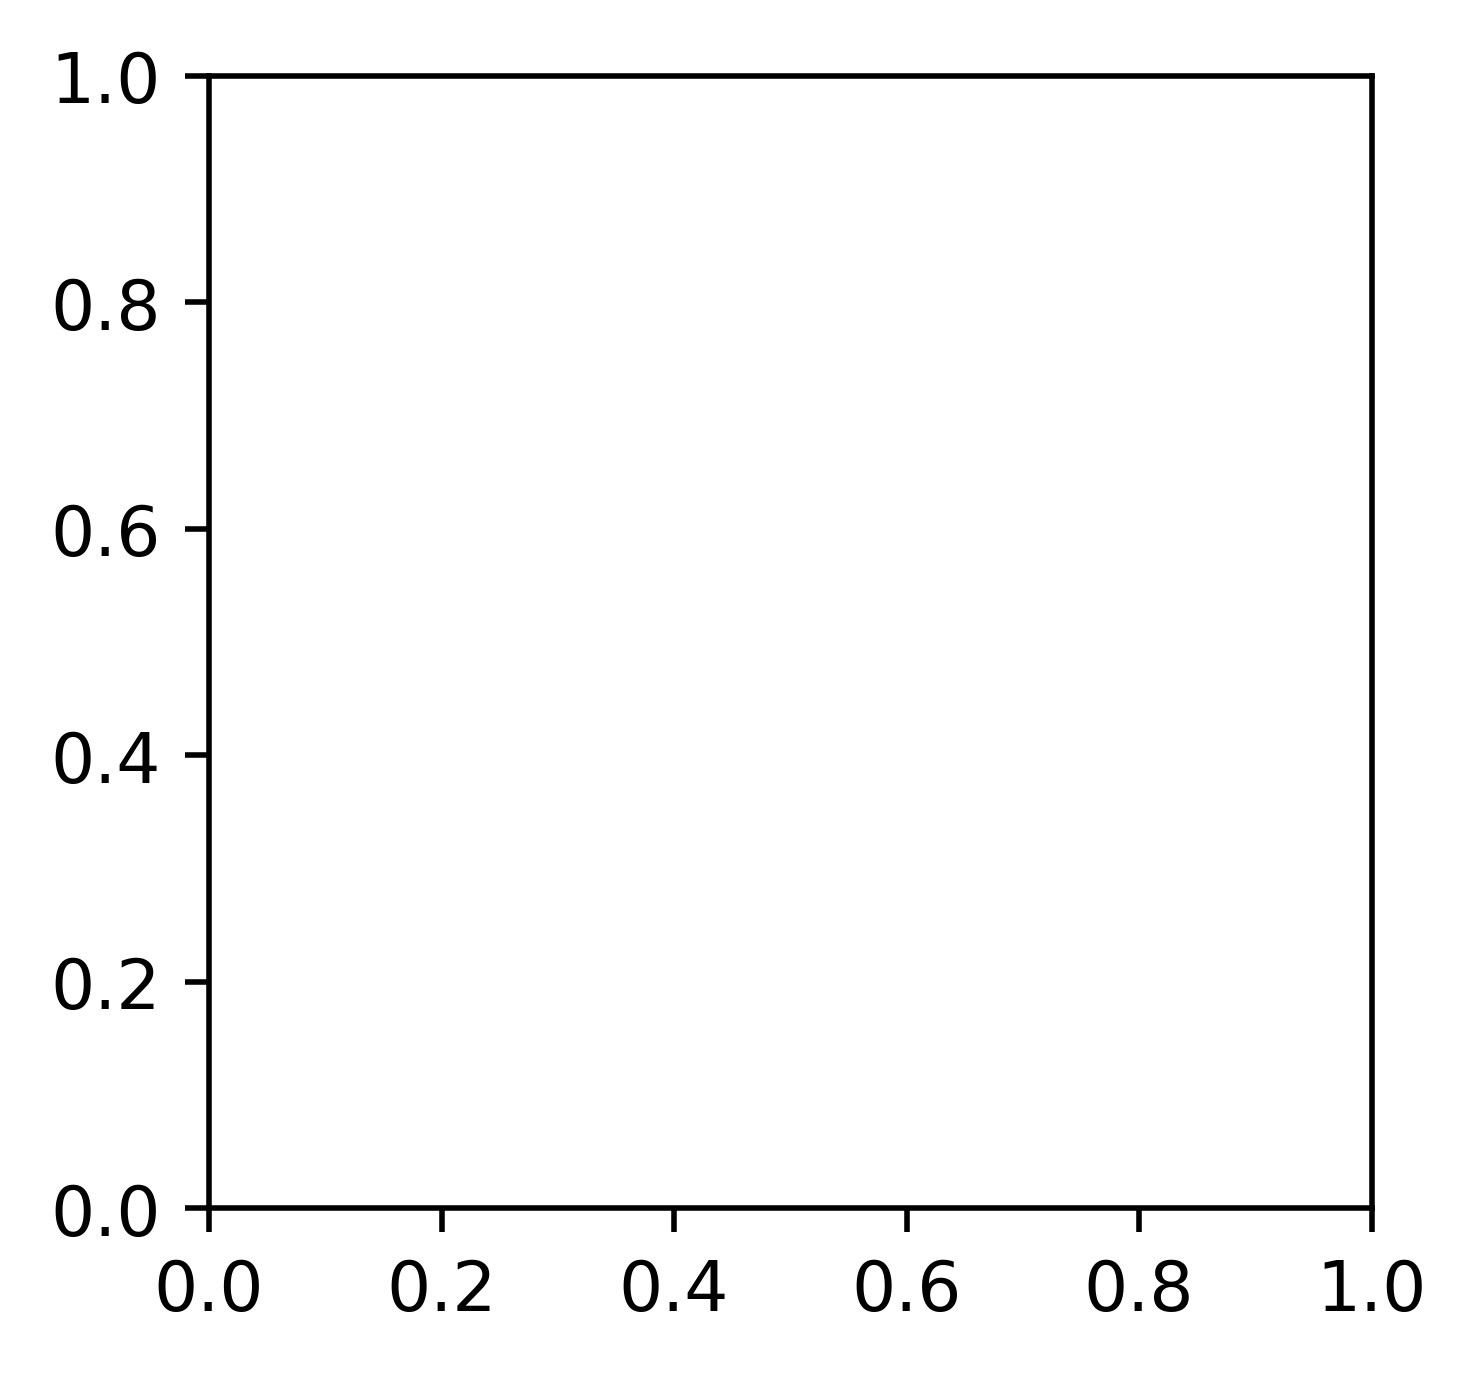

In [29]:
# generate gridded Cell Gradient for the mappingfile ELEV variable
ogh.griddedCellGradient(mappingfile=mappingfile, 
                            shapefile=riosalado,
                            outfilepath=os.path.join(homedir, 'Elevation.png'),
                            plottitle='{0} watershed\nGridded cell elevation gradient'.format('Upper Rio Salado'),
                            colorbar_label='Average elevation (meters)',
                            spatial_resolution=1/16, margin=0.25, epsg=3857, column='ELEV',
                            basemap_image=None, cmap='terrain')


** 2.8 Download climate data **

The getDailyMET_livneh2015() function reads in the mapping file table, generates the destination folder, downloads and unzips the files, then catalogs the downloaded files within the mapping file.

*View data extent for North America:*
Livneh, B. (2017). Gridded climatology locations (1/16th degree): North American extent, HydroShare, http://www.hydroshare.org/resource/ef2d82bf960144b4bfb1bae6242bcc7f


*Please cite:*
Livneh B., T.J. Bohn, D.S. Pierce, F. Munoz-Ariola, B. Nijssen, R. Vose, D. Cayan, and L.D. Brekke, 2015: A spatially comprehensive, hydrometeorological data set for Mexico, the U.S., and southern Canada 1950-2013, Nature Scientific Data, 5:150042, doi:10.1038/sdata.2015.42.


In [30]:
ogh.getDailyMET_livneh2015(homedir, mappingfile)

Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.65625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.78125 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.53125_-107.90625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.53125_-107.65625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.53125_-107.78125 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.71875 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.53125_-107.71875 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.84375 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.59375 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.53125_-107.84375 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.46875_-107.90625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.40625_-107.90625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.40625_-107.65625 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.40625_-107.78125 unzipped
Meteorology_Livneh_NAmerExt_15Oct2014_34.40625_-108.03125 unzi

'/home/jovyan/work/notebooks/data/70b977e22af544f8a7e5a803935c329c/70b977e22af544f8a7e5a803935c329c/data/contents/livneh2015/Daily_MET_1950_2013/raw'

** 2.9 Summarize the file availability from mapping file **

In [31]:
t1 = ogh.mappingfileSummary(listofmappingfiles = [mappingfile], 
                            listofwatershednames = ['Upper Rio Salado'],
                            meta_file=meta_file)

watershed_table = os.path.join(homedir, 'watershed_table.txt')
t1.to_csv(watershed_table, sep='\t', header=True, index=True)

t1

Watershed,Upper Rio Salado
Median elevation in meters [range](No. gridded cells),2308[1962-2669] (n=31)
dailymet_livneh2015,2308[1962-2669] (n=31)


In [46]:
# Livneh et al., 2013
# Livneh et al., 2014
dr1 = meta_file['dailymet_livneh2015']

# Salathe et al., 2014
dr2 = meta_file['dailymet_livneh2015']

# define overlapping time window
dr = ogh.overlappingDates(date_set1=tuple([dr1['start_date'], dr1['end_date']]), 
                          date_set2=tuple([dr2['start_date'], dr2['end_date']]))

In [47]:
%%time
ltm = ogh.gridclim_dict(mappingfile=mappingfile,
                        metadata=meta_file,
                        dataset='dailymet_livneh2015',
                        file_time_step=dr['temporal_resolution'],
                        file_start_date=dr['start_date'],
                        file_end_date=dr['end_date'],
                        subset_start_date=dr[0],
                        subset_end_date=dr[1])

TypeError: tuple indices must be integers, not str

In [48]:
#These files are processed from 
#https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/NewMexico_Observatory_GridMet_RioSaladoInput.ipynb

ltm_low=ogh.readDictOfDf('RioSalado_lowElevation.json')
ltm_mid=ogh.readDictOfDf('RioSalado_midElevation.json')
ltm_high=ogh.readDictOfDf('RioSalado_highElevation.json')

In [49]:
ltm_low.keys()


['analysis_elev_max',
 u'meanmonth_midelev_WINDSPD_dailymet_livneh2015',
 u'TMAX_dailymet_livneh2015',
 'analysis_elev_max_cutoff',
 u'meanmonth_minelev_TMIN_dailymet_livneh2015',
 u'meanmonth_PRECIP_dailymet_livneh2015',
 u'anom_year_WINDSPD_dailymet_livneh2015',
 u'anom_year_PRECIP_dailymet_livneh2015',
 u'meanallyear_TMAX_dailymet_livneh2015',
 u'meanmonth_minelev_TMAX_dailymet_livneh2015',
 u'meanmonth_TMAX_dailymet_livneh2015',
 u'meanmonth_maxelev_PRECIP_dailymet_livneh2015',
 'analysis_elev_min',
 u'meanallyear_TMIN_dailymet_livneh2015',
 u'meanmonth_midelev_TMAX_dailymet_livneh2015',
 u'year_TMAX_dailymet_livneh2015',
 u'month_TMIN_dailymet_livneh2015',
 u'meanyear_TMIN_dailymet_livneh2015',
 u'meanmonth_TMIN_dailymet_livneh2015',
 u'month_WINDSPD_dailymet_livneh2015',
 u'TMIN_dailymet_livneh2015',
 u'year_TMIN_dailymet_livneh2015',
 u'meanmonth_minelev_PRECIP_dailymet_livneh2015',
 u'PRECIP_dailymet_livneh2015',
 u'anom_year_TMAX_dailymet_livneh2015',
 u'meanyear_PRECIP_dailym

In [50]:
type(ltm_low['PRECIP_dailymet_livneh2015'])

pandas.core.frame.DataFrame

In [51]:
P_met_low = ltm_low['PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_low = np.mean(P_met_low, axis=1) # Time series of a spatial mean
Tmax_met_low = np.mean(ltm_low['TMAX_dailymet_livneh2015'], axis=1) # Tmax in C
Tmin_met_low = np.mean(ltm_low['TMIN_dailymet_livneh2015'], axis=1) # Tmin in C
Wind_met_low = np.mean(ltm_low['WINDSPD_dailymet_livneh2015'], axis=1) # Wind speed in m/s

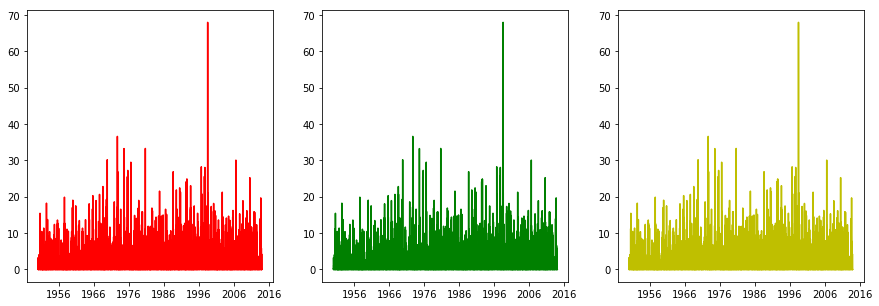

In [78]:
P_fig = plt.figure(figsize=(15, 5) )
ax1 = P_fig.add_subplot(131)
plt.plot(P_met_low, 'r-', label = 'outlet')
ax1 = P_fig.add_subplot(132)
plt.plot(P_met_mid, 'g-', label = 'outlet')
ax1 = P_fig.add_subplot(133)
plt.plot(P_met_mid, 'y-', label = 'outlet')


In [ ]:

plt.plot(hydrograph_time, discharge_midstream, 'g-', label = 'midstream')
plt.plot(hydrograph_time, discharge_upstream, 'b-', label = 'upstream')
plt.ylabel('Discharge (cms)')
plt.xlabel('Time (hours)')
plt.legend(loc = 'upper left')
title_text = 'Model=' + str(basin_flag) + '+'+ str(storm_flag) + '+ ' + routing_method 
plt.title(title_text)
plt.savefig(basin_flag + '_' + storm_flag + '_' + routing_method + '_hydrograph.png')

In [52]:
P_met_mid = np.mean(ltm_mid['PRECIP_dailymet_livneh2015'], axis=1) # Precipitation in mm
Tmax_met_mid = np.mean(ltm_mid['TMAX_dailymet_livneh2015'], axis=1) # Tmax in C
Tmin_met_mid = np.mean(ltm_mid['TMIN_dailymet_livneh2015'], axis=1) # Tmin in C
Wind_met_mid = np.mean(ltm_mid['WINDSPD_dailymet_livneh2015'], axis=1) # Wind speed in m/s

In [53]:
P_met_high = np.mean(ltm_high['PRECIP_dailymet_livneh2015'], axis=1) # Precipitation in mm
Tmax_met_high = np.mean(ltm_high['TMAX_dailymet_livneh2015'], axis=1) # Tmax in C
Tmin_met_high = np.mean(ltm_high['TMIN_dailymet_livneh2015'], axis=1) # Tmin in C
Wind_met_high = np.mean(ltm_high['WINDSPD_dailymet_livneh2015'], axis=1) # Wind speed in m/s

Note: 'Ecohyd_functions_flat.py' is a utility script that contains 'functions', which instantiates components and manages inputs and outputs, and help keep this driver concise. Contents of 'Ecohyd_functions_flat.py' can be a part of this driver (current file), however left out to keep driver concise.

To minimize computation time, we will use two grids in this driver. One grid will represent a flat landscape or domain (i.e., landscape with same elevation), on which the cellular automata plant competition will be simulated at an yearly time step. Another grid, with enough cells to house one cell for each of the plant functional types (PFTs), will be used to simulate soil moisture decay and local vegetation dynamics, in between successive storms (i.e. time step = one storm). Cumulative water stress (stress experienced by plants due to lack of enough soil moisture) will be calculated over an year and mapped to the other grid.

- grid: This grid represents the actual landscape. Each cell can be occupied by a single PFT such as tree, shrub, grass, or can be empty (bare). Initial PFT distribution is randomnly generated from inputs of percentage of cells occupied by each PFT.

- grid1: This grid allows us to calculate PFT specific cumulative water stress (cumulated over each storm in the year) and mapped with 'grid'.

Note: In this tutorial, the physical ecohydrological components and cellular automata plant competition will be run on grids with different resolution. To use grids with same resolution, see the tutorial 'cellular_automaton_vegetation_DEM.ipynb'.

In [54]:
grid_low = rmg((100, 100), spacing=(5., 5.))

Include the input file that contains all input parameters needed for all components. This file can either be a python dictionary or a text file that can be converted into a python dictionary. If a text file is provided, it will be converted to a Python dictionary. Here we use an existing text file prepared for this exercise.

In [55]:
InputFile_low = 'Inputs_Vegetation_CA_flat.txt'

Lets look at the initial organization of PFTs

In [56]:
grid_low.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_low.number_of_cells)

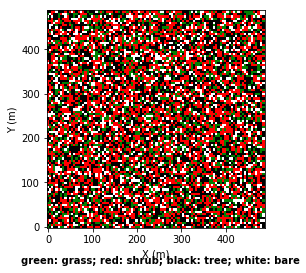

In [57]:
# Plot initial vegetation PFT state
from landlab.plot import imshow_grid
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(
            ['green', 'red', 'black', 'white', 'red', 'black'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
description = 'green: grass; red: shrub; black: tree; white: bare'
plt.figure(101)
imshow_grid(grid_low, 'vegetation__plant_functional_type', values_at='cell', cmap=cmap,
            grid_units=('m', 'm'), norm=norm, limits=[0, 5],
            allow_colorbar=False)
caption = plt.figtext(0.2, 0.0, description, weight='bold', fontsize=10)

Specify an approximate number of years for the model to run. For this example, we will run the simulation for 600 years. It might take less than 2+ minutes to run.

In [58]:
# Determine the length of simulations = length of input climate data
n = P_met_low.shape[0]

In [59]:
# Print n
n

23376

In [63]:
input_data_low = {'precip_met': P_met_low.values,
                  'Tmax_met': Tmax_met_low.values,
                  'Tmin_met': Tmin_met_low.values}
input_data_mid = {'precip_met': P_met_mid.values,
                  'Tmax_met': Tmax_met_mid.values,
                  'Tmin_met': Tmin_met_mid.values}
input_data_high = {'precip_met': P_met_high.values,
                  'Tmax_met': Tmax_met_high.values,
                  'Tmin_met': Tmin_met_high.values}

In [66]:
(VegType_low, yrs_low) = run_ecohydrology_model(
                                        grid_low, input_data=input_data_low,
                                        input_file=InputFile_low,
                                        synthetic_storms=False,
                                        number_of_storms=n,
                                        pet_method='PriestleyTaylor')
(VegType_mid, yrs_mid) = run_ecohydrology_model(
                                        grid_low, input_data=input_data_mid,
                                        input_file=InputFile_low,
                                        synthetic_storms=False,
                                        number_of_storms=n,
                                        pet_method='PriestleyTaylor')
(VegType_high, yrs_high) = run_ecohydrology_model(
                                        grid_low, input_data=input_data_high,
                                        input_file=InputFile_low,
                                        synthetic_storms=False,
                                        number_of_storms=n,
                                        pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  0  years
Elapsed time =  0  years


Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare
Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare
Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


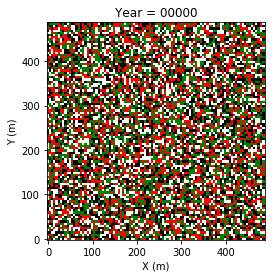

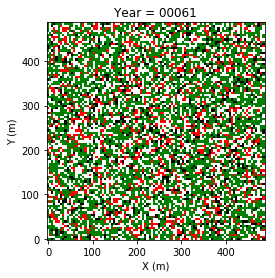

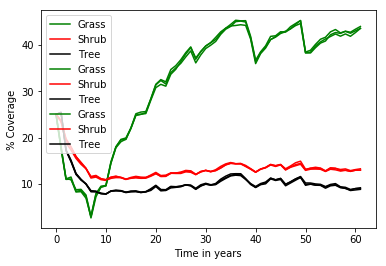

In [67]:
plot_results(grid_low, VegType_low, yrs_low, yr_step=yrs_low-1)
plot_results(grid_low, VegType_mid, yrs_mid, yr_step=yrs_mid-1)
plot_results(grid_low, VegType_high, yrs_high, yr_step=yrs_high-1)

Let's look at outputs.

Plots of the cellular field of PFT at specified year step can be found below where:

GRASS = green;  SHRUB = red;  TREE = black;  BARE = white;  

At the end, percentage cover of each PFT is plotted with respect to time.

If you want to explore this model further, open 'Inputs_Vegetation_CA.txt' and change the input parameters (e.g., initial PFT distribution percentages, storm characteristics, etc..).

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>